# Exploratory data analysis

In [7]:
import kagglehub
#Ajouter kagglehub

/home/bousquetcedric34/.pyenv/versions/Music-Env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


https://rapidapi.com/soundnet-soundnet-default/api/track-analysis

**The API returns the following core data:**
- key Musical key of the track (e.g. "C", "G#")
- mode Either "major" or "minor".
- tempo An integer to represent the BPM of the track.
- and a host of audio features like camelot, duration, popularity, energy, danceability, happiness, acousticness, instrumentalness, liveness, speechiness, & loudness

In [1]:
# ajouter matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from sklearn.manifold import TSNE

In [3]:
from adjustText import adjust_text

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/bousquetcedric34/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1


In [5]:
data = pd.read_csv("/home/bousquetcedric34/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1/dataset.csv")

In [36]:
data.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [7]:
data[["artists", "popularity"]].drop_duplicates().sort_values('popularity', ascending=False).head(10)

artists  popularity
20001        Sam Smith;Kim Petras         100
51664            Bizarrap;Quevedo          99
67356               Manuel Turizo          98
20008     David Guetta;Bebe Rexha          98
67358  Bad Bunny;Chencho Corleone          97
67359                   Bad Bunny          97
79000                 OneRepublic          96
67559                   Bad Bunny          96
20000                 Chris Brown          96
81052                Harry Styles          95

In [117]:
data[["album_name", "popularity"]].drop_duplicates().sort_values('popularity', ascending=False).head(10)

album_name  popularity
20001                          Unholy (feat. Kim Petras)         100
51664              Quevedo: Bzrp Music Sessions, Vol. 52          99
20008                                    I'm Good (Blue)          98
67356                                         La Bachata          98
67358                                   Un Verano Sin Ti          97
67559                                   Un Verano Sin Ti          96
79000  I Ain’t Worried (Music From The Motion Picture...          96
20000                                  Indigo (Extended)          96
81052                                          As It Was          95
67500                                   Un Verano Sin Ti          95

In [118]:
data[["track_name", "popularity"]].drop_duplicates().sort_values('popularity', ascending=False).head(10)

track_name  popularity
20001              Unholy (feat. Kim Petras)         100
51664  Quevedo: Bzrp Music Sessions, Vol. 52          99
20008                        I'm Good (Blue)          98
67356                             La Bachata          98
67359                       Tití Me Preguntó          97
67358                        Me Porto Bonito          97
20000                    Under The Influence          96
79000                        I Ain't Worried          96
67559                                 Efecto          96
81052                              As It Was          95

<Axes: xlabel='track_genre', ylabel='count'>

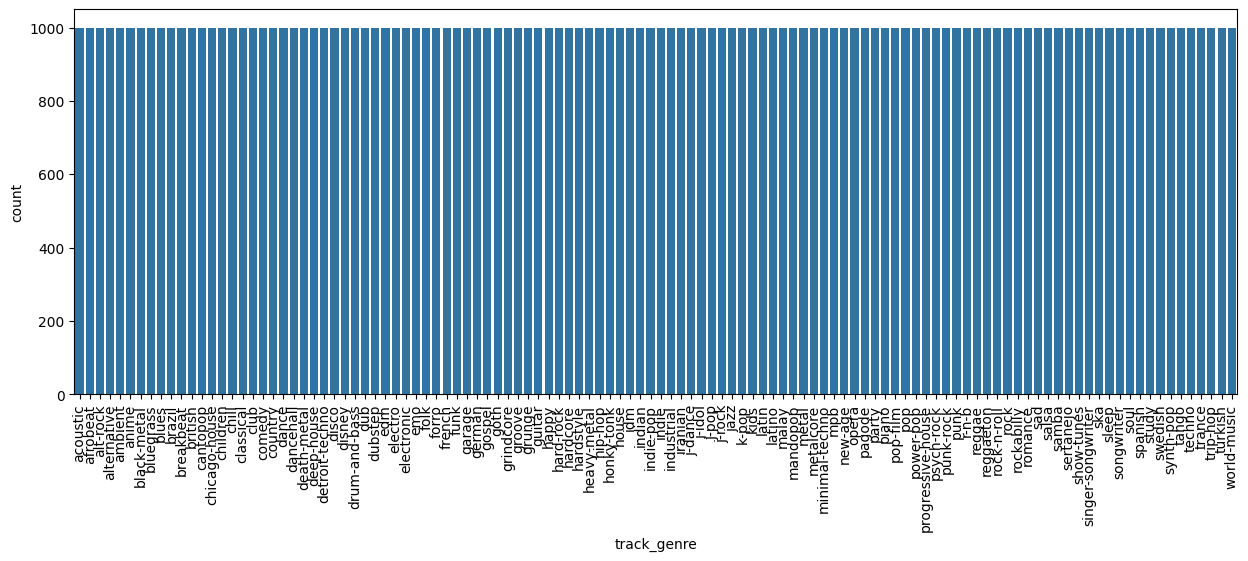

In [119]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(data=data,x="track_genre")

<Axes: xlabel='popularity', ylabel='Count'>

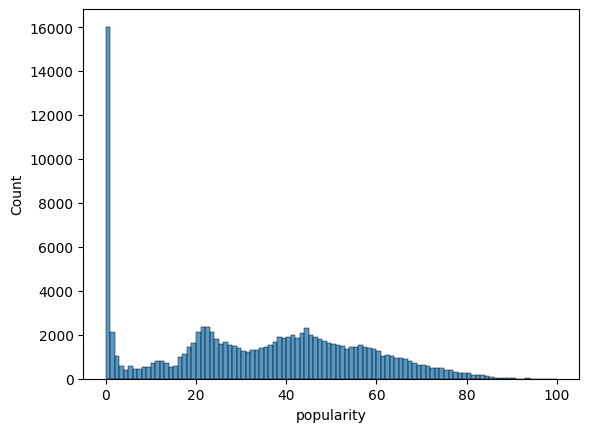

In [120]:
sns.histplot(data, x="popularity", binwidth=1)

<Axes: xlabel='popularity', ylabel='Count'>

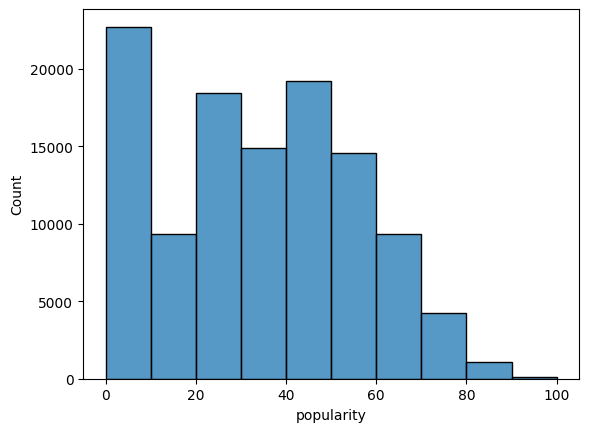

In [121]:
sns.histplot(data, x="popularity", binwidth=10)

<Axes: xlabel='popularity', ylabel='Count'>

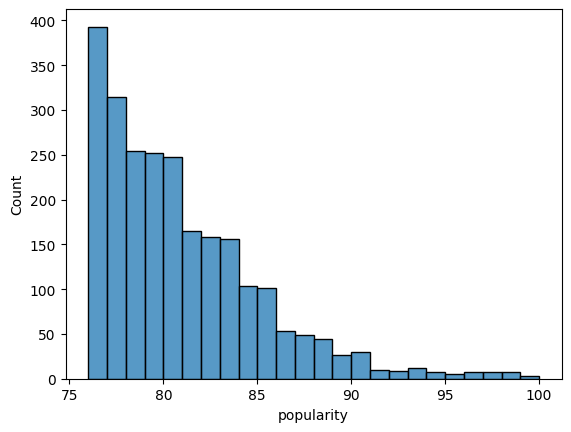

In [122]:
sns.histplot(data[data["popularity"] > 75], x="popularity", binwidth=1)

<Axes: xlabel='mode', ylabel='Count'>

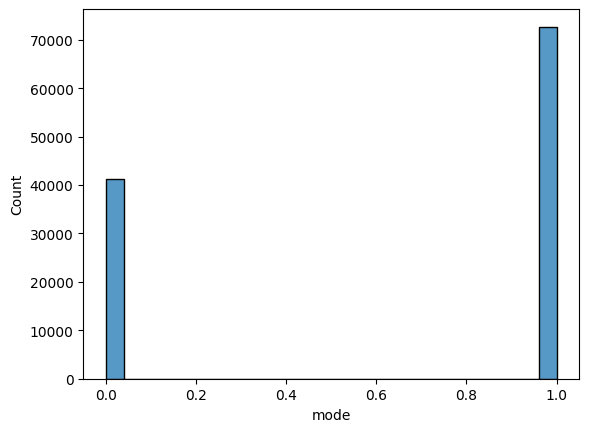

In [123]:
sns.histplot(data, x="mode")

In [124]:
data["mode"].unique()

array([0, 1])

<Axes: xlabel='key', ylabel='Count'>

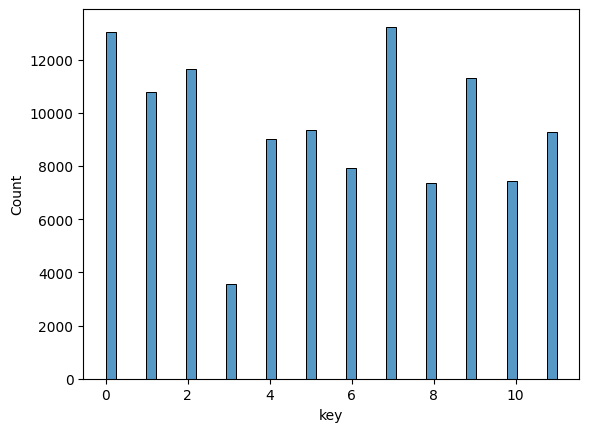

In [125]:
sns.histplot(data, x="key")

In [126]:
data["key"].drop_duplicates().sort_values()

2      0
0      1
4      2
13     3
11     4
24     5
5      6
12     7
10     8
25     9
17    10
7     11
Name: key, dtype: int64

<Axes: xlabel='popularity', ylabel='track_genre'>

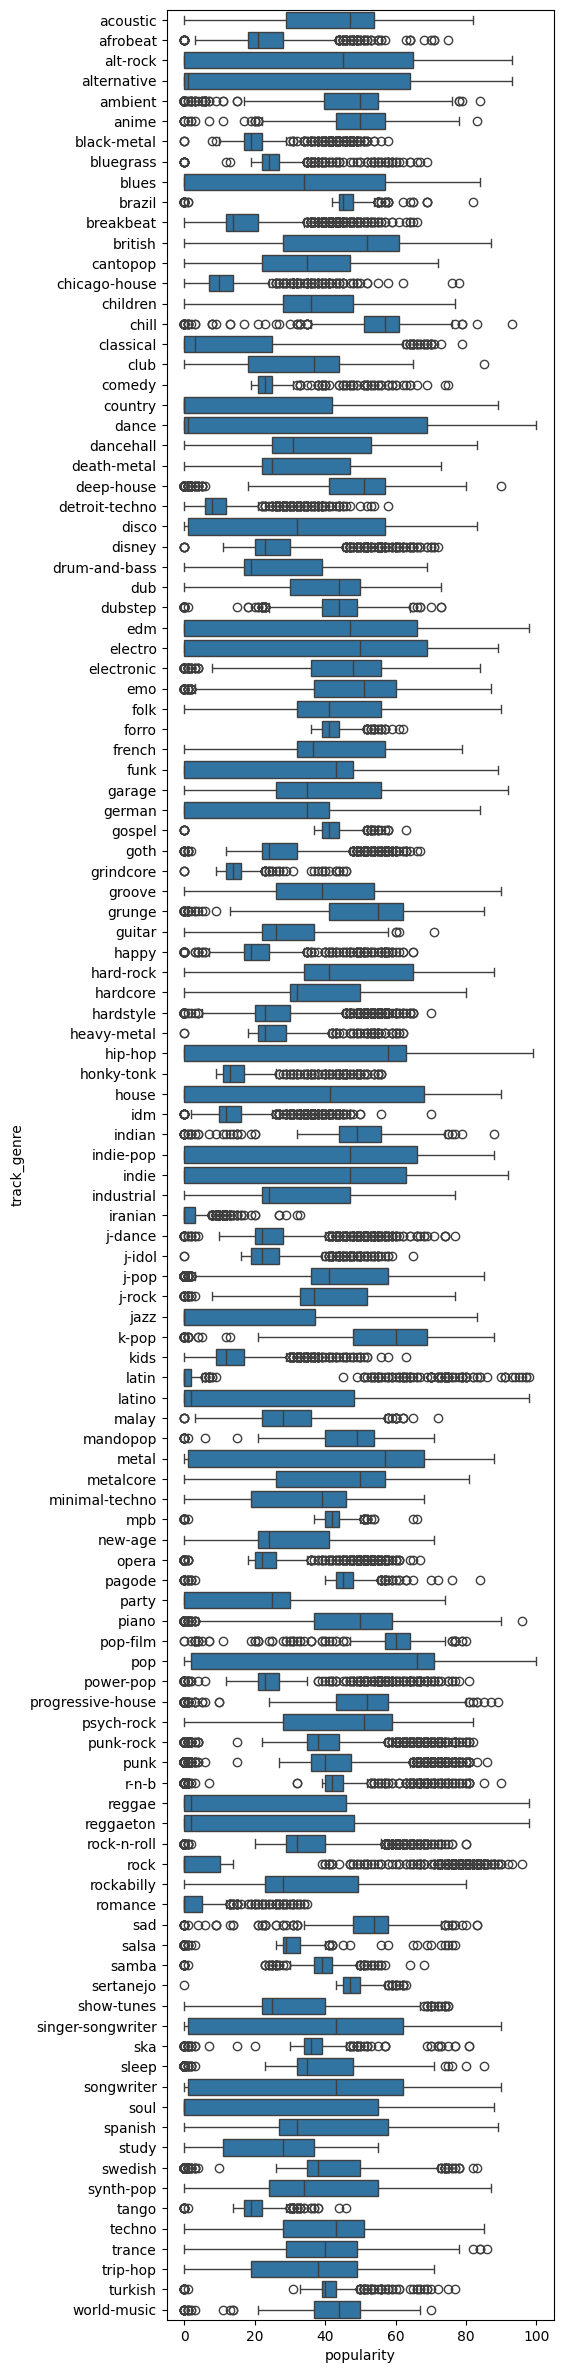

In [127]:
plt.figure(figsize=(5,30))
sns.boxplot(data, x="popularity", y="track_genre")

<Axes: xlabel='mode', ylabel='popularity'>

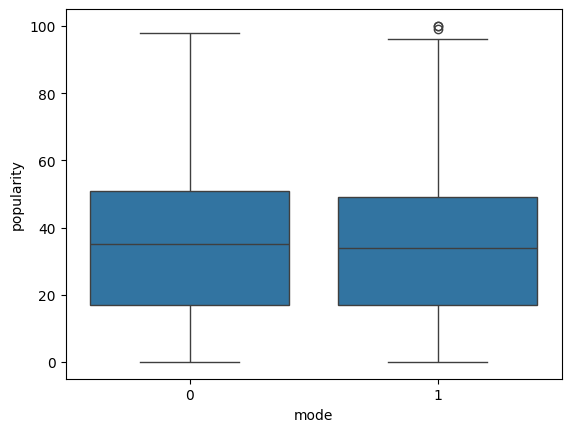

In [128]:
sns.boxplot(data, x="mode", y="popularity")

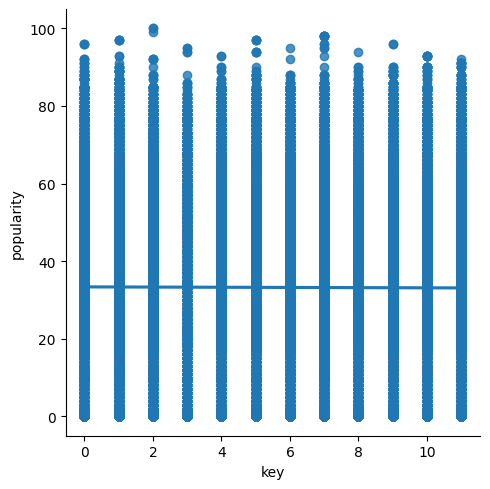

In [129]:
sns.lmplot(data, x="key", y="popularity")

In [130]:
data.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [131]:
dat = data[["popularity", "danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence",  "tempo"]]

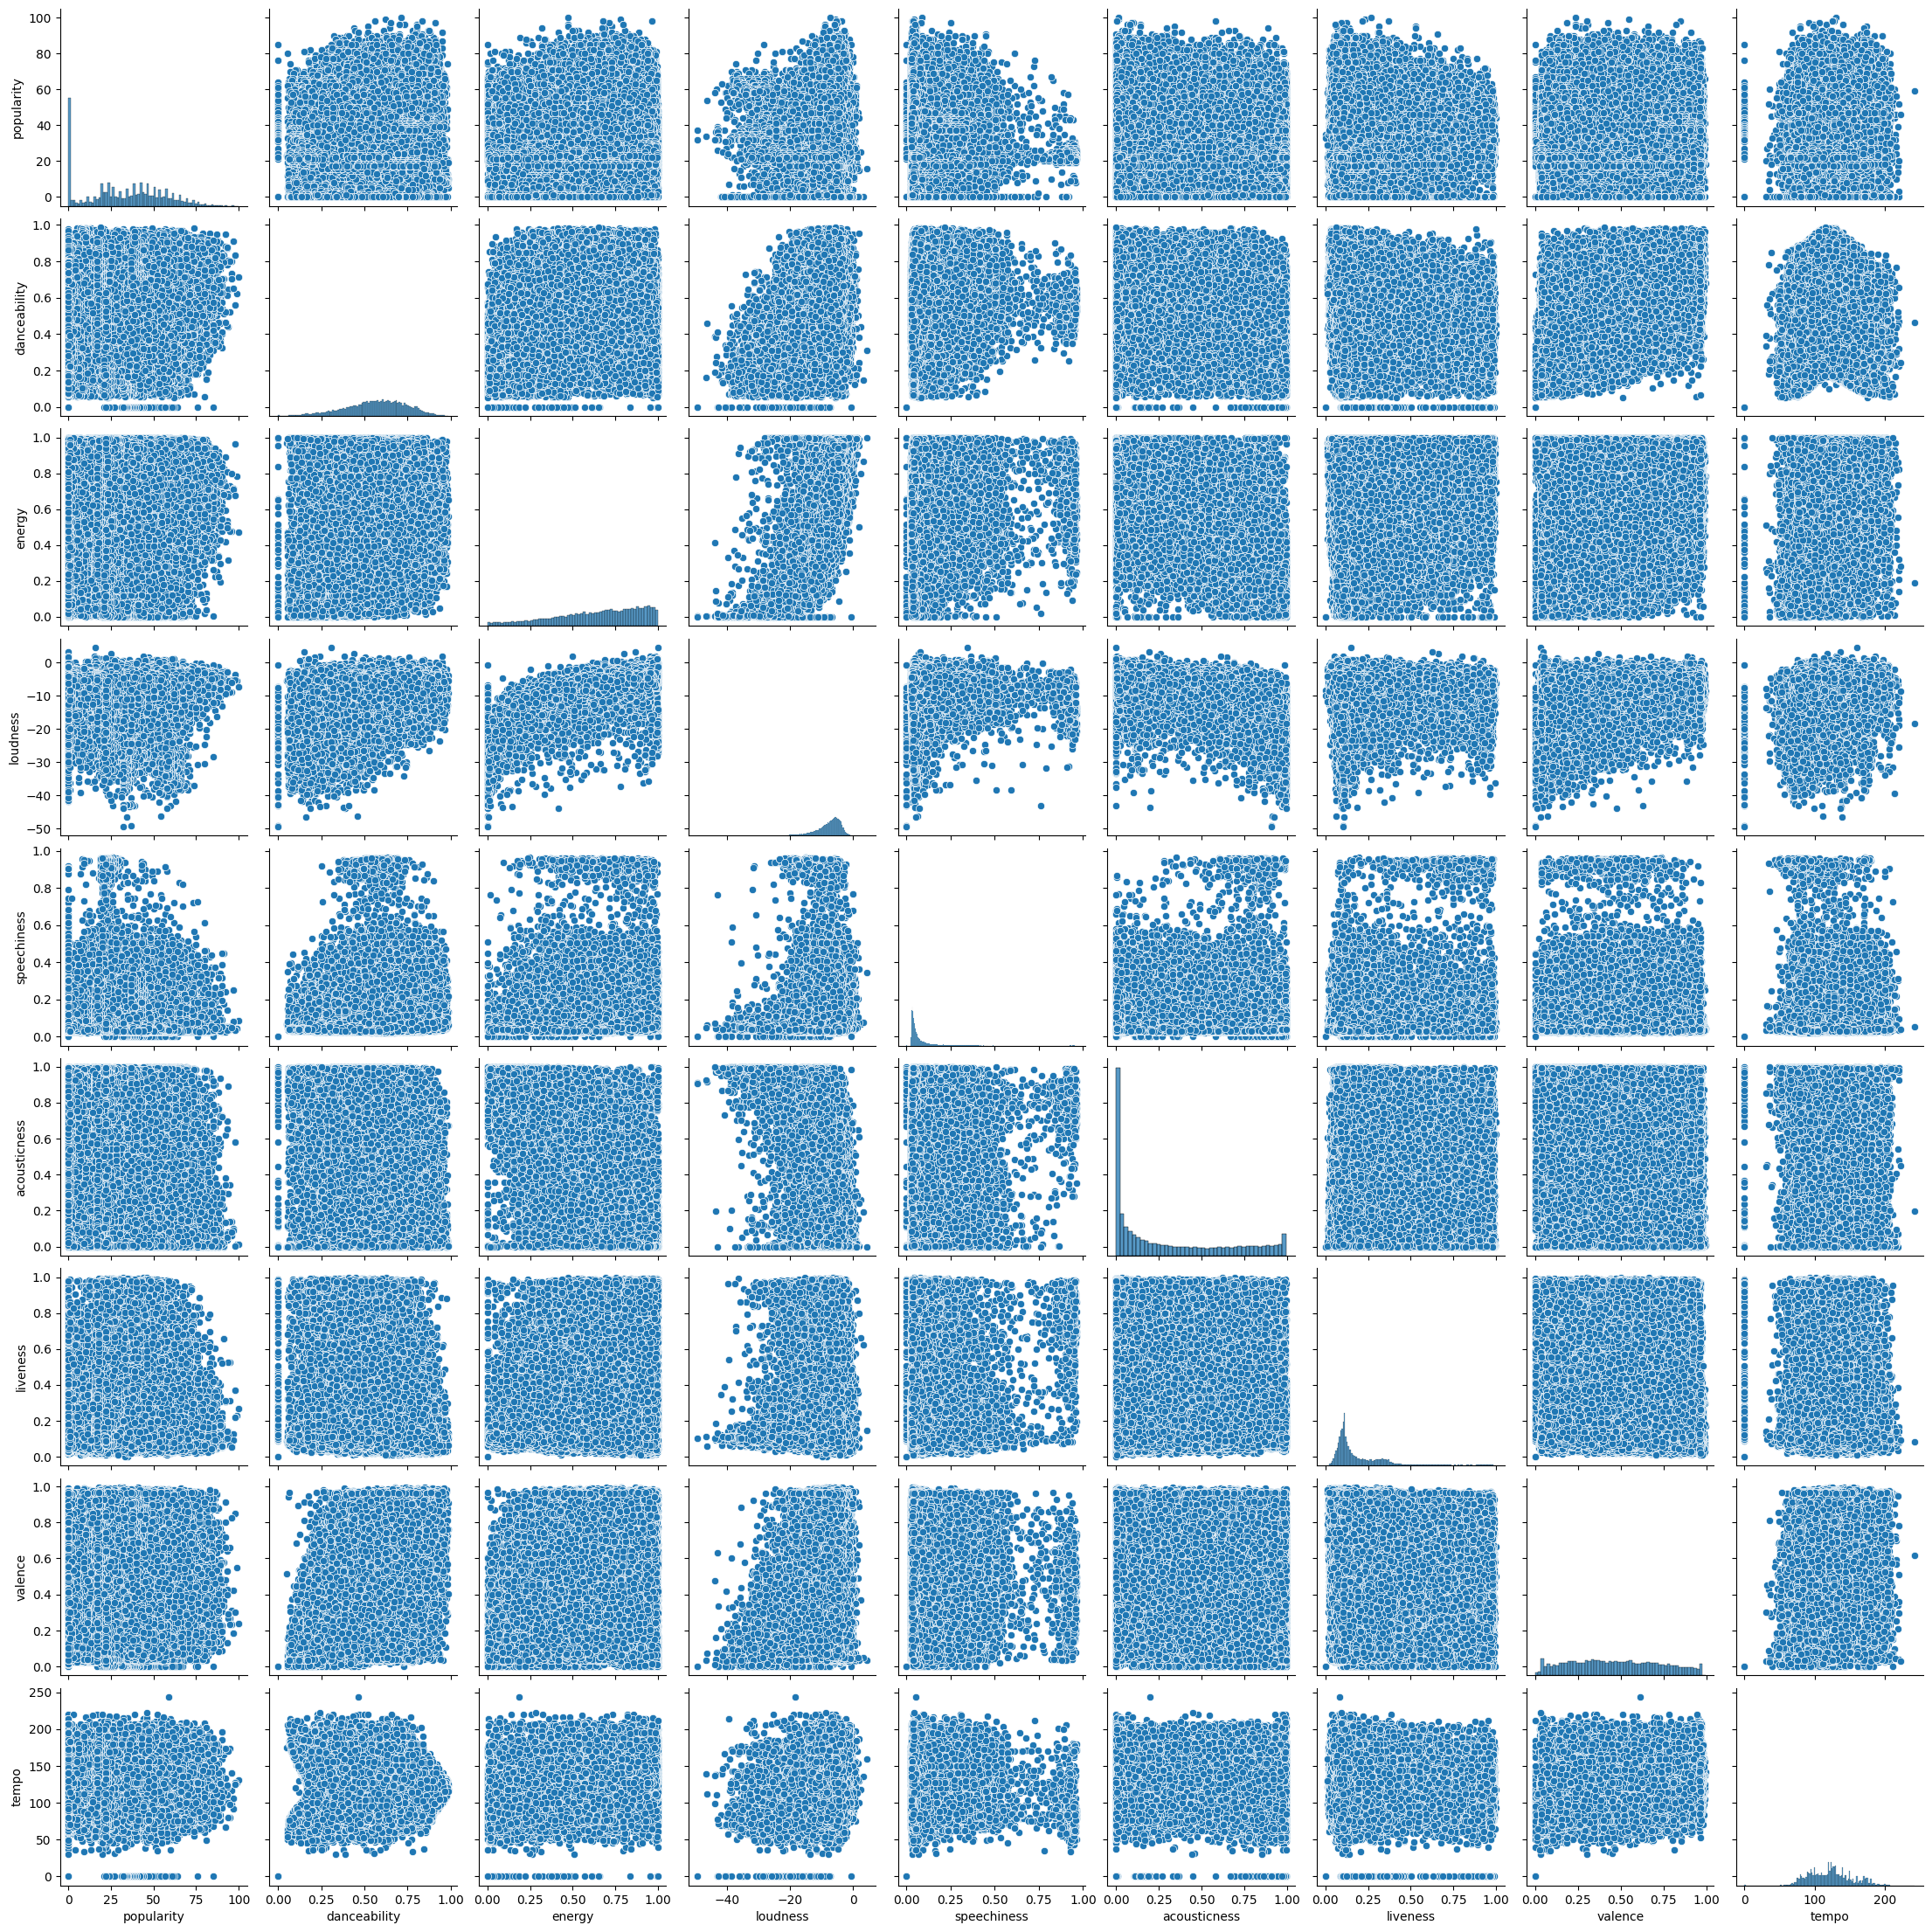

In [132]:
sns.pairplot(data[["popularity", "danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence",  "tempo"]])

In [133]:
corr = dat.corr()

In [134]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

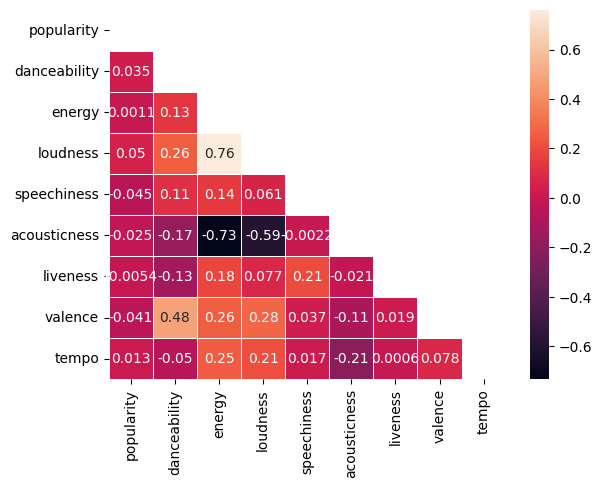

In [135]:
sns.heatmap(corr, mask=mask, linewidths=.5, annot=True)

In [136]:
data.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# t-SNE

In [9]:
data["cat_pop"] = data["popularity"].apply(lambda x: 'zero' if (x == 0)
                                                    else '1-75' if ((x > 0) and (x < 76))
                                                    else '76+')

In [134]:
data_sample = data.sample(n=500, random_state=42)
t_X = data_sample[["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence",  "tempo"]]
t_y = data_sample["cat_pop"].astype("string") #.apply(lambda x: 0 if "Zero"
                             #      else 1 if "1-75"
                             #      else 2)

In [135]:
scaler = StandardScaler()
t_X = scaler.fit_transform(t_X)

In [136]:
tsne = TSNE(n_components=3, perplexity=40, random_state=42)

In [137]:
tsne.fit_transform(t_X)

array([[-0.13425498,  4.0463996 ,  0.82714295],
       [ 3.7281601 ,  5.025039  ,  0.2878105 ],
       [-6.0980816 ,  3.9074788 , -3.5408516 ],
       ...,
       [-8.332763  ,  4.184973  ,  0.6433032 ],
       [-5.096549  ,  2.5356736 , -3.008577  ],
       [ 5.469225  ,  3.7158883 , -0.38798138]],
      shape=(500, 3), dtype=float32)

In [138]:
tsne_df = pd.DataFrame(tsne.embedding_, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])

In [139]:
tsne_df["label"] = t_y.reset_index(drop=True)

In [8]:
import nbformat
import plotly.express as px

In [ ]:
px.scatter_3d(data_frame=tsne_df, x="TSNE-1", y="TSNE-2", z="TSNE-3", color="label")

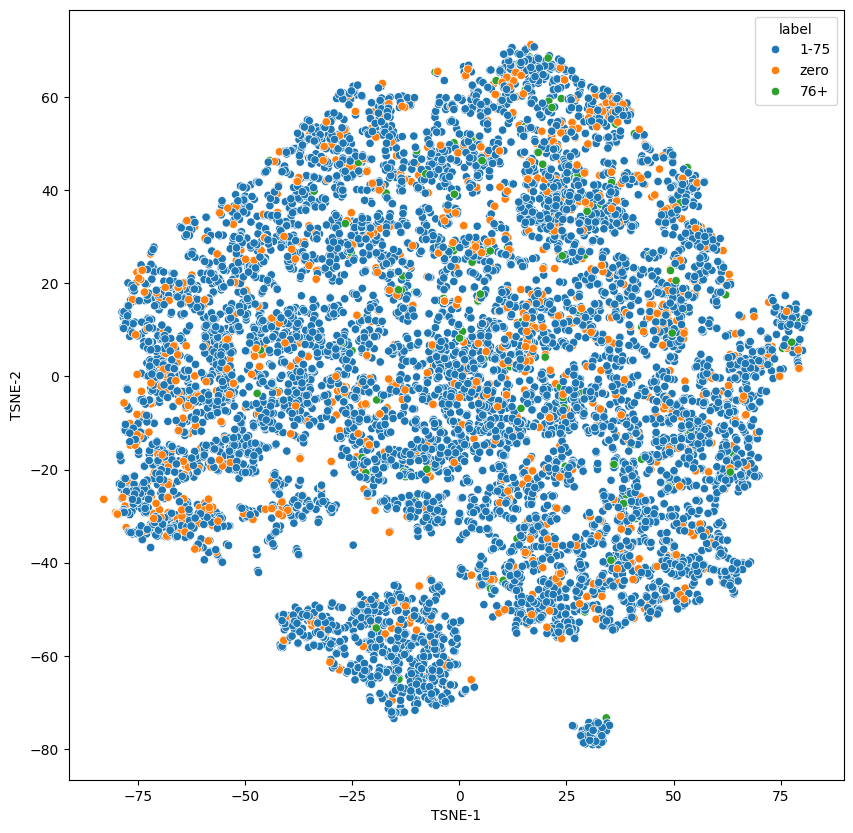

In [73]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=tsne_df, x="TSNE-1", y="TSNE-2", hue="label")
plt.savefig("t-SNE.png")

# Analyse en composantes principales

## ACP en 2D

In [97]:
pca_X = data[["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence",  "tempo"]]
pca_y = data["track_genre"].astype("string")

In [98]:
pca_scaler = StandardScaler()
std_pca_X = pca_scaler.fit_transform(pca_X)

In [117]:
pca = PCA(n_components=2)

In [118]:
X_pca = pca.fit_transform(std_pca_X)

In [119]:
print(pca.explained_variance_ratio_)

[0.33940262 0.17106719]


In [120]:
print(pca.explained_variance_)

[2.71524477 1.36854954]


In [103]:
cov_mat = np.cov(std_pca_X.T)

In [104]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals) 


Eigenvalues 
 [2.71524477 1.36854954 0.16121408 0.37725358 0.48127715 1.19433059
 0.80548819 0.89671228]


In [105]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

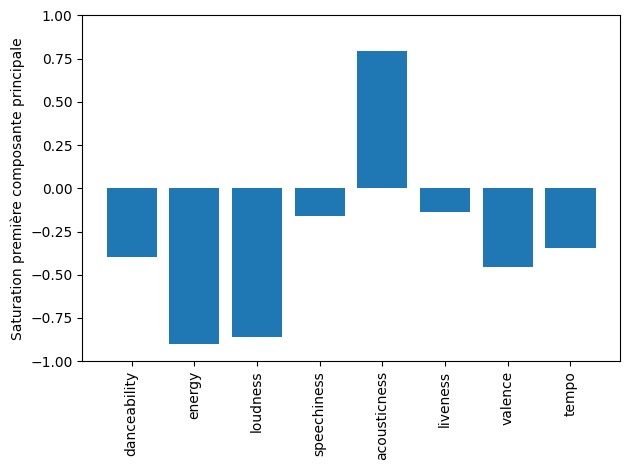

In [112]:
fig, ax = plt.subplots()
ax.bar(range(8), loadings[:,0], align="center")
ax.set_ylabel("Saturation première composante principale")
ax.set_xticks(range(8))
ax.set_xticklabels(pca_X.columns[0:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()

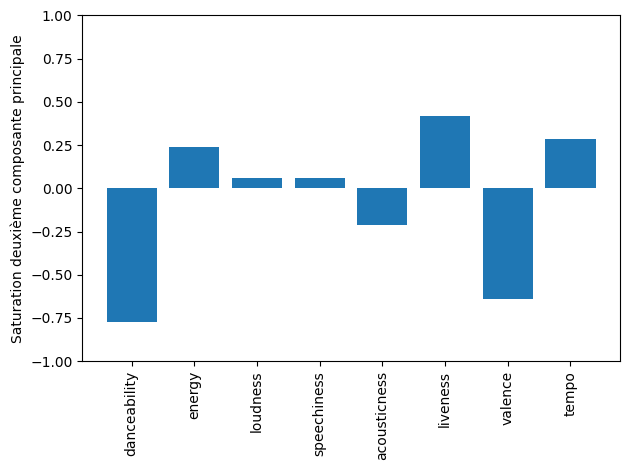

In [145]:
fig, ax = plt.subplots()
ax.bar(range(8), loadings[:,1], align="center")
ax.set_ylabel("Saturation deuxième composante principale")
ax.set_xticks(range(8))
ax.set_xticklabels(pca_X.columns[0:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()

In [121]:
df_pca = pd.DataFrame(X_pca, columns=["COMP-1", "COMP-2"])

In [122]:
df_pca["track_genre"] = pca_y

In [ ]:
sns.scatterplot(data=df_pca,
                x="COMP-1",
                y="COMP-2",
                hue="track_genre")

In [9]:
genre_df = data[["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence",  "tempo", "track_genre"]]
genre_features = genre_df.groupby('track_genre').mean()
comedy = genre_features[~genre_features.index.isin(["sleep", "comedy"])]
display(comedy.shape)

(112, 8)

In [129]:
genre_features.dtypes

danceability    float64
energy          float64
loudness        float64
speechiness     float64
acousticness    float64
liveness        float64
valence         float64
tempo           float64
dtype: object

In [10]:
scaler = StandardScaler()
scaled_genre_features = scaler.fit_transform(comedy)
comedy.shape

(112, 8)

In [160]:
pca = PCA(n_components=2)
pca_genres = pca.fit_transform(comedy)

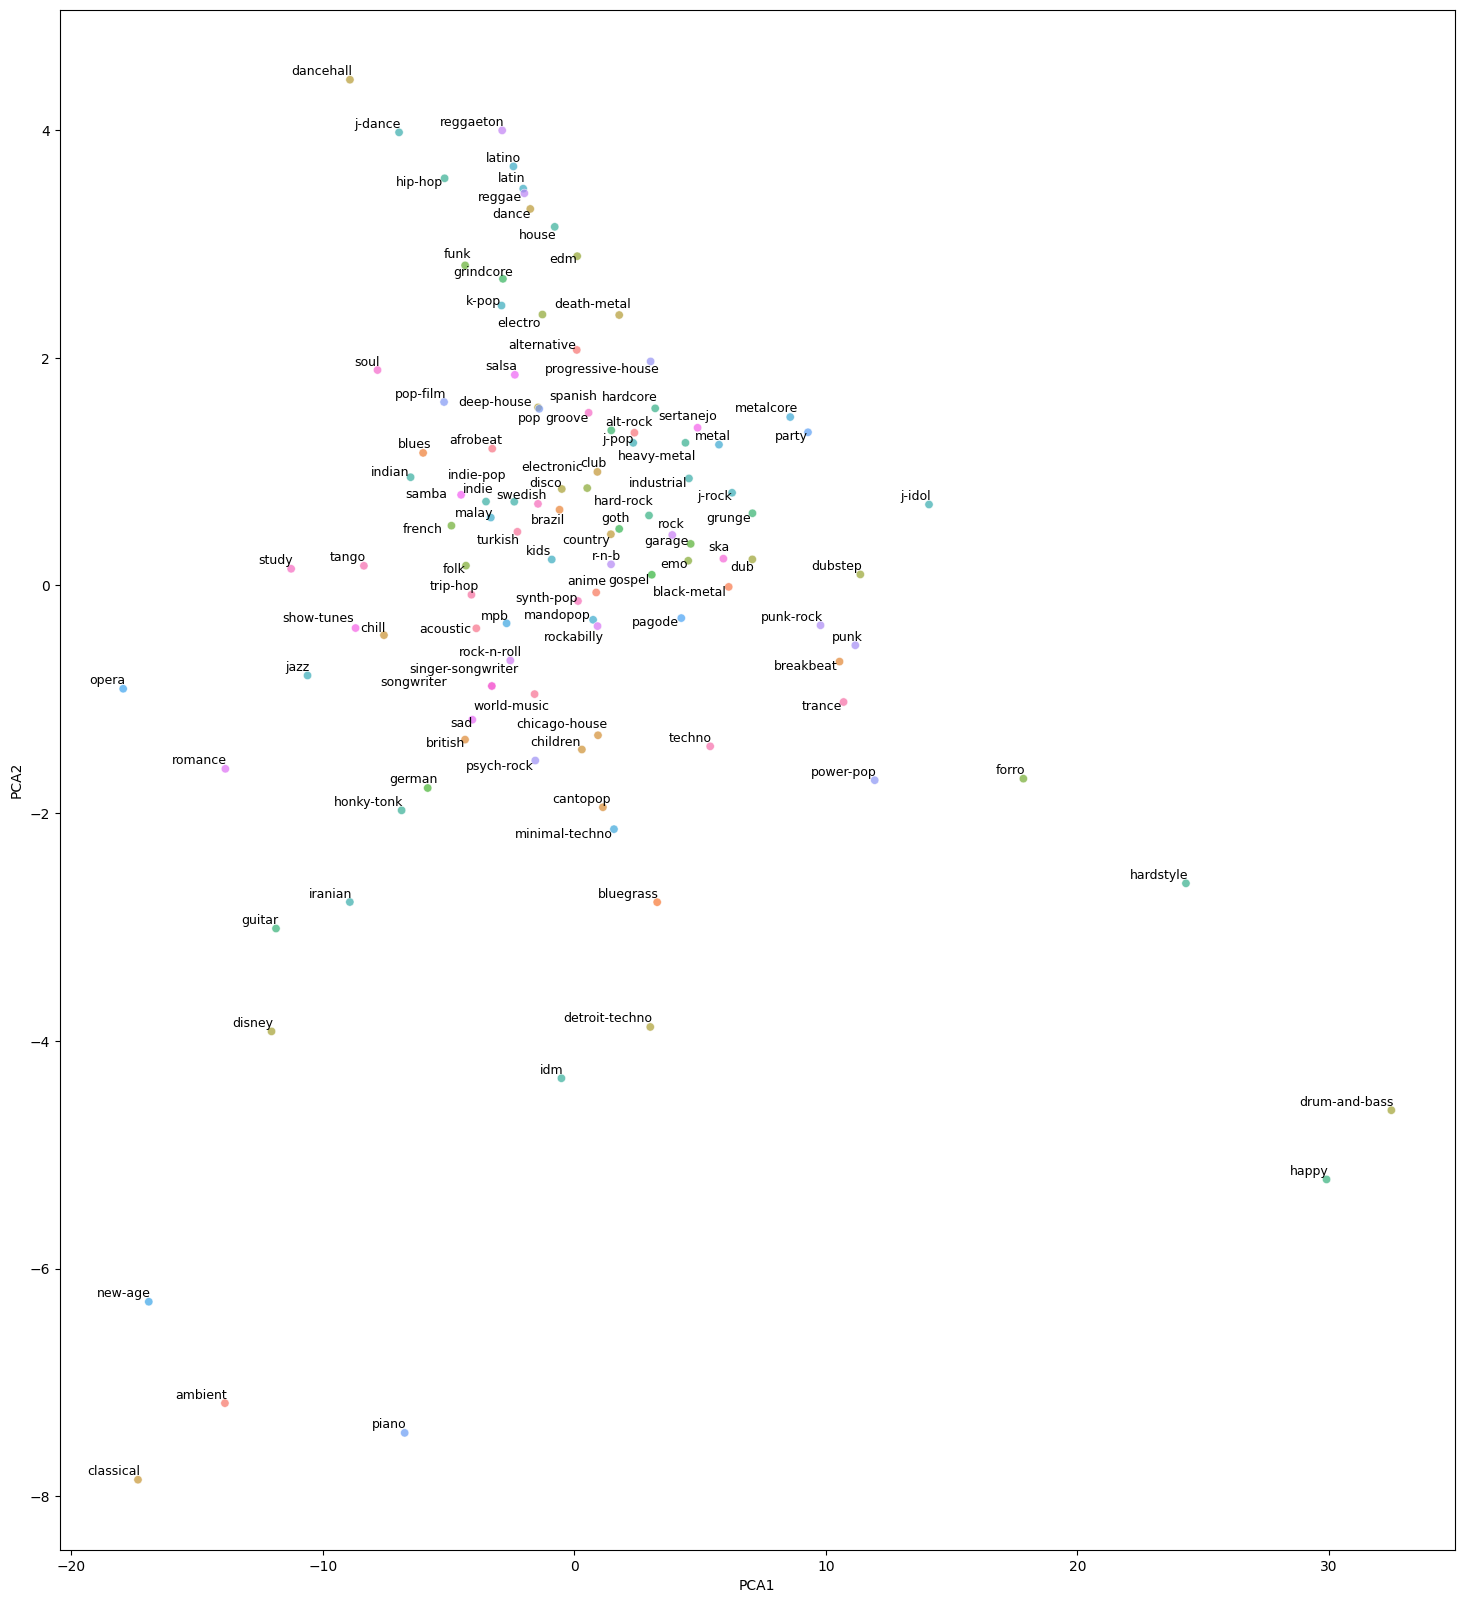

In [168]:
pca_df = pd.DataFrame(pca_genres, columns=['PCA1', 'PCA2'])
pca_df['genre'] = comedy.index.tolist()

plt.figure(figsize=(18, 20))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='genre', legend=False, alpha=0.7)

texts = []
for i, row in pca_df.iterrows():
    texts.append(plt.text(row['PCA1'], row['PCA2'], row['genre'], fontsize=9, ha='right'))

adjust_text(texts);
plt.savefig("PCA-2D.png")

## ACP en 3D

In [11]:
pca_3d = PCA(n_components=3)
pca_genres_3d = pca_3d.fit_transform(comedy)

In [12]:
pca_df_3d = pd.DataFrame(pca_genres_3d, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df_3d['genre'] = comedy.index.tolist()

In [13]:
import plotly.graph_objects as go

In [14]:
fig = go.Figure()
fig = px.scatter_3d(pca_df_3d, x='PCA1', y='PCA2', z='PCA3', color="genre")

fig.update_layout(
    autosize=False,
    width=900,
    height=900,
    )

fig.show()

# FAISS

In [25]:
# audio features pour caractériser les chansons
song_X = data[["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence",  "tempo"]]

In [26]:
# Application d'une standardisation parce que toutes les features n'ont pas la même échelle
scaler = StandardScaler()
song_features = scaler.fit_transform(song_X)
song_features.shape

(114000, 8)

In [43]:
song_features

array([[ 0.62924424, -0.71714792,  0.30082834, ...,  0.75874327,
         0.92930586, -1.14186279],
       [-0.84590798, -1.88997974, -1.78474412, ..., -0.59121068,
        -0.79868969, -1.48971712],
       [-0.74218634, -1.12266943, -0.2932884 , ..., -0.50716686,
        -1.36568823, -1.528312  ],
       ...,
       [ 0.35841551, -1.24194046, -0.52413497, ..., -0.68103252,
         1.03730558,  0.34125493],
       [ 0.11639835, -0.53824138, -0.52294196, ...,  0.29650223,
        -0.23554828,  0.4607423 ],
       [-0.23510276, -0.6137797 , -0.3867405 , ..., -0.65266773,
         0.90230593, -1.43270877]], shape=(114000, 8))

### Création d'un index FAISS de type Flat L2

In [18]:
import faiss

In [27]:
# dimension de l'Index
d = song_features.shape[1]
print(f'Dimension : {d}')

Dimension : 8


In [28]:
# Création de l'IndexError
index = faiss.IndexFlatL2(d)

# Doit-on entrainer l'index ?
index.is_trained

True

In [29]:
# Transformer les audio features en float32
song_features_32 = artist_features.astype('float32')

In [30]:
# Ajouter les vecteurs à l'index
index.add(song_features_32)

In [31]:
# Nombre de vecteurs ajoutés à l'index
print(f'Nombre de vecteurs : {index.ntotal}')

Nombre de vecteurs : 114000


### Requête sur une chanson pour trouver les voisins les plus proches

In [ ]:
# Un data set qui contient les informations sur les chansons en plus des audio features
detailed_song_X = pd.DataFrame(song_features, columns=["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence",  "tempo"])

detailed_song_X.loc[:, "track_id"] = data.loc[:, "track_id"]
detailed_song_X.loc[:, "artists"] = data.loc[:, "artists"]
detailed_song_X.loc[:, "album_name"] = data.loc[:, "album_name"]
detailed_song_X.loc[:, "track_name"] = data.loc[:, "track_name"]
detailed_song_X.loc[:, "popularity"] = data.loc[:, "popularity"]
detailed_song_X.loc[:, "duration_ms"] = data.loc[:, "duration_ms"]
detailed_song_X.loc[:, "explicit"] = data.loc[:, "explicit"]

danceability    energy  loudness  speechiness  acousticness  liveness  \
0      0.629244 -0.717148  0.300828     0.551848     -0.850202  0.758743   
1     -0.845908 -1.889980 -1.784744    -0.078993      1.831732 -0.591211   
2     -0.742186 -1.122669 -0.293288    -0.273826     -0.315499 -0.507167   
3     -1.733304 -2.312994 -2.039252    -0.457309      1.774593 -0.428376   
4      0.295030 -0.788711 -0.282750    -0.303145      0.463399 -0.686285   

    valence     tempo                track_id                 artists  \
0  0.929306 -1.141863  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1 -0.798690 -1.489717  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2 -1.365688 -1.528312  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3 -1.276974  1.987859  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4 -1.184403 -0.073348  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  
0                      Comedy          73       230666     False  
1            Ghost - Acoustic          55       149610     False  
2              To Begin Again          57       210826     False  
3  Can't Help Falling In Love          71       201933     False  
4                     Hold On          82       198853     False

In [83]:
# La chanson est In the End de Linkin Park
detailed_song_X[detailed_song_X["track_name"] == 'In the End'].head(10)

danceability    energy  loudness  speechiness  acousticness  liveness  \
3006      -0.062233  0.885060  0.475007    -0.248289     -0.918227 -0.023915   
44001     -0.062233  0.885060  0.475007    -0.248289     -0.918227 -0.023915   
44231     -0.067996  0.805546  0.336420    -0.277609     -0.922437 -0.651617   
44482     -0.062233  0.885060  0.475007    -0.248289     -0.918227 -0.023915   
71001     -0.062233  0.885060  0.475007    -0.248289     -0.918227 -0.023915   
71922     -0.067996  0.805546  0.336420    -0.277609     -0.922437 -0.651617   

        valence     tempo                track_id      artists  \
3006  -0.285691 -0.567243  60a0Rd6pjrkxjPbaKzXjfq  Linkin Park   
44001 -0.285691 -0.567243  60a0Rd6pjrkxjPbaKzXjfq  Linkin Park   
44231 -0.038835 -0.565575  6zyrb7dW1IR4Hrc8nXJsln  Linkin Park   
44482 -0.285691 -0.567243  7q115ia4fQn9zonjpexWsY  Linkin Park   
71001 -0.285691 -0.567243  60a0Rd6pjrkxjPbaKzXjfq  Linkin Park   
71922 -0.038835 -0.565575  6zyrb7dW1IR4Hrc8nXJsln  Linkin Park   

                                     album_name  track_name  popularity  \
3006              Hybrid Theory (Bonus Edition)  In the End          85   
44001             Hybrid Theory (Bonus Edition)  In the End          85   
44231  Hybrid Theory (20th Anniversary Edition)  In the End          54   
44482                             Hybrid Theory  In the End          48   
71001             Hybrid Theory (Bonus Edition)  In the End          85   
71922  Hybrid Theory (20th Anniversary Edition)  In the End          54   

       duration_ms  explicit  
3006        216880     False  
44001       216880     False  
44231       216800     False  
44482       216880     False  
71001       216880     False  
71922       216800     False

In [85]:
# L'artiste est Lana Del Rey

detailed_song_X[detailed_song_X["artists"] == 'Lana Del Rey'].head(20)

danceability    energy  loudness  speechiness  acousticness  liveness  \
81675      0.427563 -0.327529 -0.571259    -0.464875      0.267923 -0.629556   
81677     -1.220458 -0.430897 -0.245369    -0.220862     -0.805392  0.895314   
81679     -1.197409 -0.120793  0.115912    -0.432718     -0.327528 -0.650041   
81689     -0.044946  0.129676  0.424304    -0.489465     -0.853209 -0.486156   
81691      0.427563 -1.174354 -0.248352    -0.460146      1.798652 -0.575452   
81694     -1.087925  0.089919  0.310372    -0.415694      0.682934 -0.543936   
81697      0.617720 -1.734927 -1.175914    -0.419477      1.744520 -0.522925   
81699      0.617720 -1.734927 -1.175914    -0.419477      1.744520 -0.522925   
81875     -0.575079 -2.076838 -0.543024    -0.421369      1.967062 -0.610646   
81887     -1.116737 -2.096716 -0.976682    -0.412857      1.870828 -0.575452   
81892     -1.116737 -2.096716 -0.976682    -0.412857      1.870828 -0.575452   
81893     -1.116737 -2.096716 -0.976682    -0.412857      1.870828 -0.575452   
81896     -1.116737 -2.096716 -0.976682    -0.412857      1.870828 -0.575452   
81898     -2.079043 -0.021400  0.331648    -0.405290     -0.312492  0.018107   

        valence     tempo                track_id       artists  \
81675  0.188736  0.761696  3TmDnZuy3pHQbFJG5fRu2a  Lana Del Rey   
81677 -0.490119 -0.028549  5rRifW8OsCeZaqDPjxTSTq  Lana Del Rey   
81679 -0.181548 -0.970638  50pfrD2Dne6PZam0YaweZu  Lana Del Rey   
81689 -1.068689 -0.339309  1L9lVBNz63TWO3mNxbiIa5  Lana Del Rey   
81691 -1.107260 -0.001562  2s694fZ36AJLuVnn3IBtFU  Lana Del Rey   
81694 -1.465588 -0.528114  3PWYDDiIbO4gTPArrAtir0  Lana Del Rey   
81697 -0.470833 -0.872666  4IutCwE0y4Zei7ZKdGiaK8  Lana Del Rey   
81699 -0.470833 -0.872666  178n5kx0b6eR5nOddJfpGU  Lana Del Rey   
81875 -1.226831 -1.722888  3lNIknH3h8S5xce8H0z5QA  Lana Del Rey   
81887 -1.165117 -1.040856  1LATi1QmWT9eUWmrLi1Onk  Lana Del Rey   
81892 -1.165117 -1.040856  0HFXVKOkmnqOUHCrXfrH9y  Lana Del Rey   
81893 -1.165117 -1.040856  4KTz9qihKKpn9nSYPyk245  Lana Del Rey   
81896 -1.165117 -1.040856  4fBahiFCAD77g3dsb9YC0m  Lana Del Rey   
81898 -0.308834 -1.479443  5rLVwM5DvEWm1mFyUU32y4  Lana Del Rey   

                                    album_name  \
81675  Frühstücksmusik Herbst/Winter 2022/2023   
81677                     Halloween Party 2022   
81679               Best Alternative Pop Tunes   
81689                  Halloween & Alternative   
81691                           Herbststimmung   
81694  Frühstücksmusik Herbst/Winter 2022/2023   
81697            Happy Haunted Halloween Tunes   
81699                  Halloween & Alternative   
81875  Frühstücksmusik Herbst/Winter 2022/2023   
81887                               West Coast   
81892               Best Alternative Pop Tunes   
81893               Best Alternative Pop Tunes   
81896               Best Alternative Pop Tunes   
81898                  Halloween & Alternative   

                                              track_name  popularity  \
81675                                         Doin' Time           0   
81677                                             Cherry           7   
81679                                         West Coast           2   
81689                                 Summertime Sadness           0   
81691                            If You Lie Down With Me           5   
81694                                      Brooklyn Baby           0   
81697  Season Of The Witch - From The Motion Picture ...           4   
81699  Season Of The Witch - From The Motion Picture ...           2   
81875                           Happiness is a butterfly           0   
81887                                     Blue Banisters           0   
81892                                     Blue Banisters           1   
81893                                     Blue Banisters           1   
81896                                     Blue Banisters           0   
81898                                    

In [60]:
# Ids pour In the End
in_the_end_Ids = detailed_song_X[detailed_song_X["track_name"] == 'In the End'].index.to_list()
nb_ids = len(in_the_end_Ids)
nb_ids

6

In [94]:
# Je prends la ligne 81898 pour l'exemple : Born To Die par Lana Del Rey 
xq = song_features_32[81898].reshape(1, -1)

# Nombre de vecteurs à extraire : 10 en supplément de In the End
k = 25

xq.shape

(1, 8)

In [ ]:
# Je prends la ligne 3006 pour l'exemple
xq = song_features_32[3006].reshape(1, -1)

# Nombre de vecteurs à extraire : 10 en supplément de In the End
k = 10 + nb_ids

xq.shape

In [95]:
# Requête avec FAISS
D, I = index.search(xq, k)
print(I)

[[ 81898  50300  25131  25141  25144  25145  25147  37481  37492  37494
   37495  37497 103580 103588 103589 103592 103593  76756  56111  57165
     637  43683  47456  82057  93812]]


In [96]:
similar_ids = I.flatten()
similar_ids

array([ 81898,  50300,  25131,  25141,  25144,  25145,  25147,  37481,
        37492,  37494,  37495,  37497, 103580, 103588, 103589, 103592,
       103593,  76756,  56111,  57165,    637,  43683,  47456,  82057,
        93812])

In [97]:
similar_songs = data.iloc[similar_ids].copy()
song_list = similar_songs[["artists", "album_name", "track_name", "popularity"]]
song_list.groupby(["track_name"]).first()

artists  \
track_name                                           
Born To Die                           Lana Del Rey   
Drive - 2017 Remaster                     The Cars   
Mimmi                                       Ritviz   
My Favorite Things - Stereo           The Supremes   
Ninguém Explica Deus                        Kemuel   
O minorenne                               Patrizio   
The Joke                            Brandi Carlile   
Потерянный Рай                                Aria   
Прекрасна Родина зимой       Александр Добронравов   

                                                    album_name  popularity  
track_name                                                                  
Born To Die                            Halloween & Alternative           6  
Drive - 2017 Remaster        Heartbeat City (Expanded Edition)          70  
Mimmi                                                    Mimmi          53  
My Favorite Things - Stereo             Classic Christmas 2022           0  
Ninguém Explica Deus                      Ninguém Explica Deus          26  
O minorenne                             Papà..è Natale, vol. 1          19  
The Joke                             By The Way, I Forgive You          60  
Потерянный Рай                                           Штиль          39  
Прекрасна Родина зимой                   Мужики, как мужики...           0